In [7]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import sys
sys.path.append('../lib')
import Powerspectra


In [8]:
def forcefield(x, k):
    return -x * k

def make_trajectory(time, dt, k=1, Diffusion_particle=1, detection_noise=0):
    # Compute the number of steps
    n_steps = int(time / dt)
    
    # Allocate arrays for x values and forces
    trajectory_particle = np.empty(n_steps + 1)
    times = np.arange(0, time + dt, dt)
    
    # Initialize the first value of x
    trajectory_particle[0] = np.random.normal()
    
    # Precalculate random terms for efficiency
    sqrt_dt_diffusion = np.sqrt(2 * Diffusion_particle * dt)
    rand_terms_trajectory = np.random.normal(scale=sqrt_dt_diffusion, size=n_steps)
    rand_terms_detection = np.random.normal(scale=detection_noise, size=n_steps)
    
    for i in range(n_steps):
        force = forcefield(trajectory_particle[i], k)
        trajectory_particle[i + 1] = trajectory_particle[i] + force * dt + rand_terms_trajectory[i]
        
    # Add detection noise
    trajectory_particle[1:] += rand_terms_detection
    
    return times, trajectory_particle
def average_trajectory(trajectory, times, dt):
    bin_size = int(dt / (times[1] - times[0]))
    reshaped_trajectory = trajectory[:len(trajectory)//bin_size * bin_size].reshape(-1, bin_size)
    reshaped_times = times[:len(times)//bin_size * bin_size].reshape(-1, bin_size)
    return np.mean(reshaped_trajectory, axis=1), np.mean(reshaped_times, axis=1)


In [15]:
simulation_time = 1000
dt = 0.0001
times, trajectory_particle = make_trajectory(simulation_time, dt, k=1, Diffusion_particle=1, detection_noise=0)
dTau = dt * 10
avg_trajectory, avg_times = average_trajectory(trajectory_particle, times, dTau)

In [29]:
fk, Pk = Powerspectra.powerspectrum(avg_trajectory, dTau)
analytical_ps = Powerspectra.fast_analytical_noisy_powerspectrum(fk, dTau)

In [31]:

N_smooth = 101
binned_fk, binned_ps =Powerspectra.bin_data(fk,Pk, N_smooth)

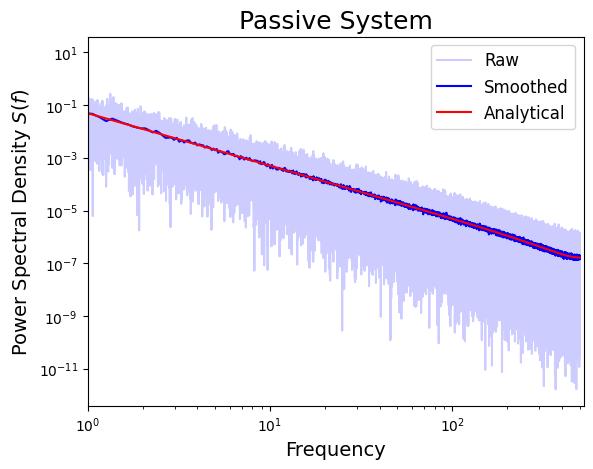

In [36]:
plt.plot(fk, Pk, alpha=0.2, color = 'blue', label='Raw')
plt.plot(binned_fk, binned_ps, color = 'blue',label='Smoothed')
plt.plot(fk, analytical_ps, color = 'red', label='Analytical')
plt.xlim((1))
plt.xlabel('Frequency', fontsize=14)  # Adjust fontsize as desired
plt.ylabel(r'Power Spectral Density $S(f)$', fontsize=14)  # Adjust fontsize as desired
plt.xscale('log')
plt.title('Passive System', fontsize=18)  # Adjust fontsize as desired
plt.yscale('log')
plt.legend(fontsize=12)  # Adjust the fontsize of the legend too if desired
plt.show()
